# Introdução ao Naïve Bayes

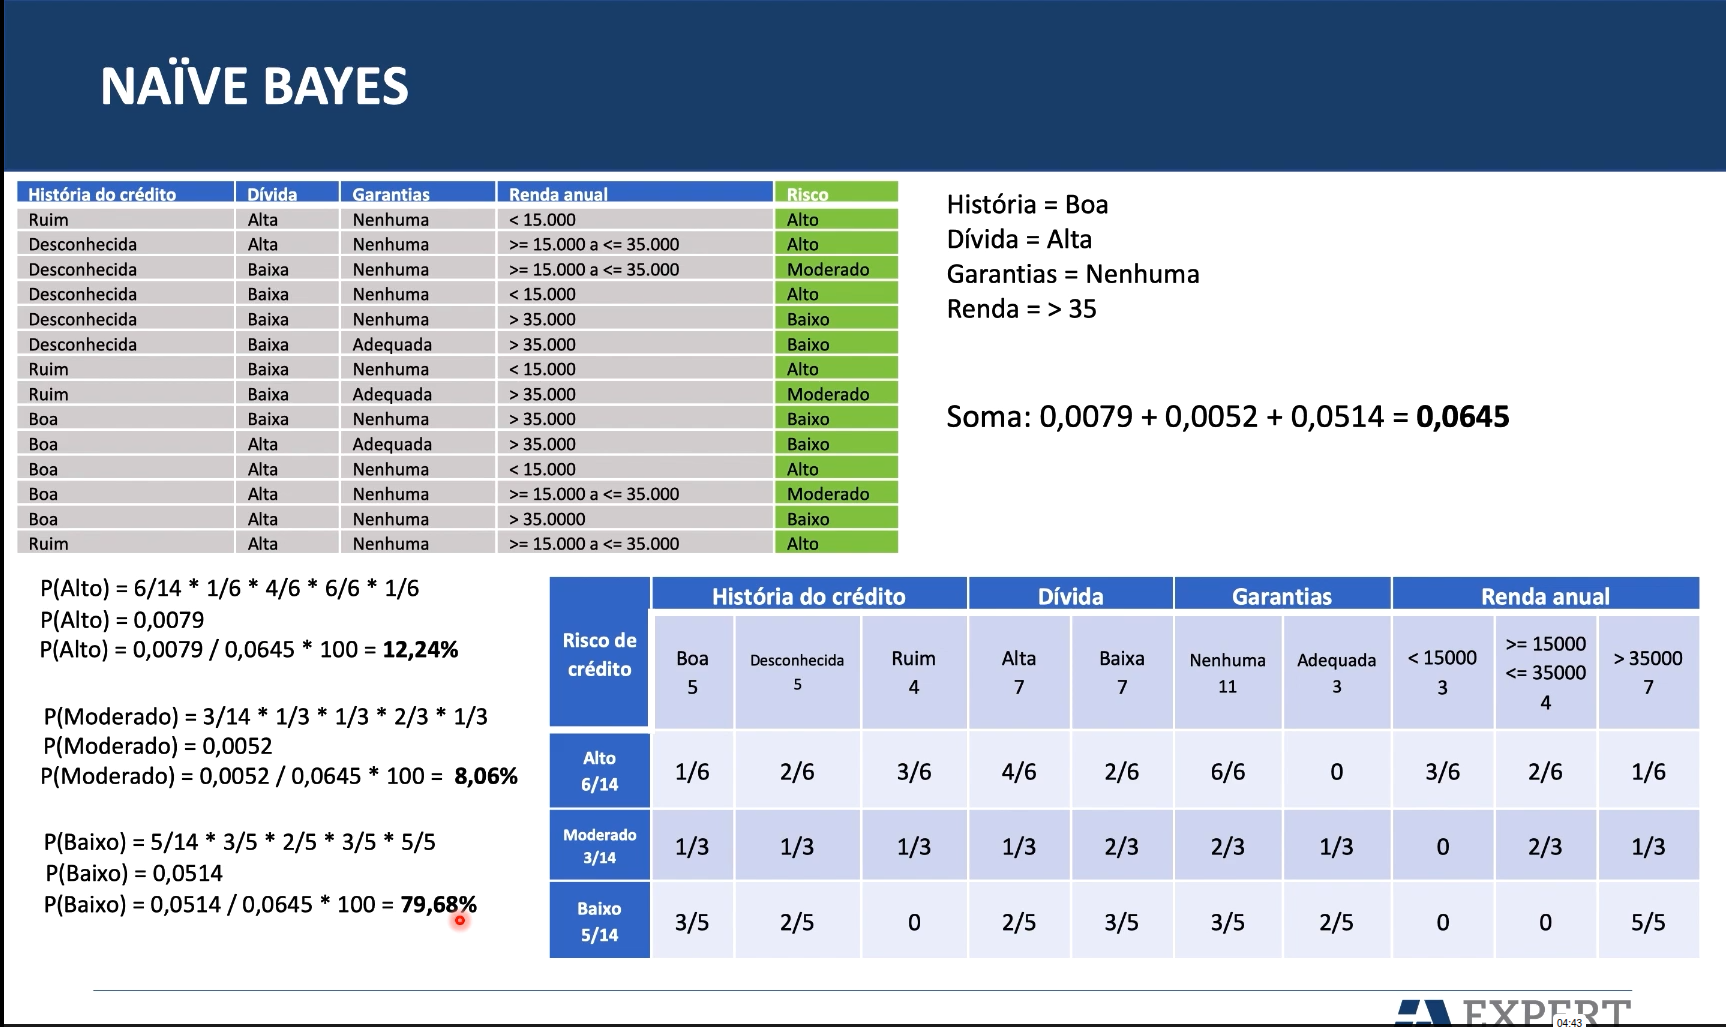

# Classificação com Dados Desbalanceados

## Carregamento da base de dados

In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns

dataset = pd.read_csv('Bases de dados/credit_data.csv')
dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [2]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

In [4]:
import plotly.express as px

In [ ]:
# sns.countplot(dataset['c#default'].value_counts())
df_aux = dataset['c#default'].value_counts().reset_index()
px.bar(df_aux, x='c#default', y='count')

In [13]:
x = dataset.iloc[:, 1:4].values
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]], shape=(1997, 3))

In [14]:
y = dataset.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0], shape=(1997,))

## Base de treinamento e testes

In [15]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y, test_size=0.2, stratify=y)

In [16]:
x_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [18]:
x_teste.shape, y_teste.shape

((400, 3), (400,))

In [29]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [30]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [23]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [31]:
343/len(y_teste),57 / len(y_teste)

(0.8575, 0.1425)

## Classificação com Naïve Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()
modelo.fit(x_treinamento, y_treinamento)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [35]:
previsoes = modelo.predict(x_teste)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.925

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(previsoes, y_teste)
cm

array([[338,  25],
       [  5,  32]])

<Axes: >

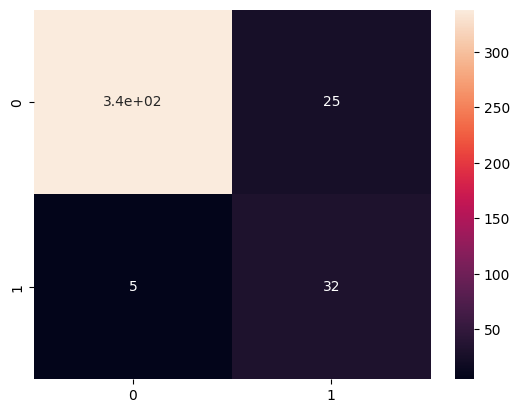

In [39]:
sns.heatmap(cm, annot=True)

In [41]:
(338 + 32) / (338 + 25 + 5 + 32)

0.925

In [42]:
# Percentual de acerto para pessoas que pagam o empréstimo
338 / (338+25)

0.931129476584022

In [43]:
# Percentual de acerto para pessoas que não pagam o empréstimo
32 / (32 + 5)

0.8648648648648649

In [44]:
# Perdas: 5.000
# Clientes não pagadores: 1.000
1000 * 18 / 100

180.0

In [ ]:
180 * 5000 # prejuízo estimado se 180 pessoas não pagarem uma dívida de 5000

900000

## Subamostragem (undersampling) - Tomek links

## Sobreamostragem (oversampling) - SMOTE